In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from IPython.display import clear_output

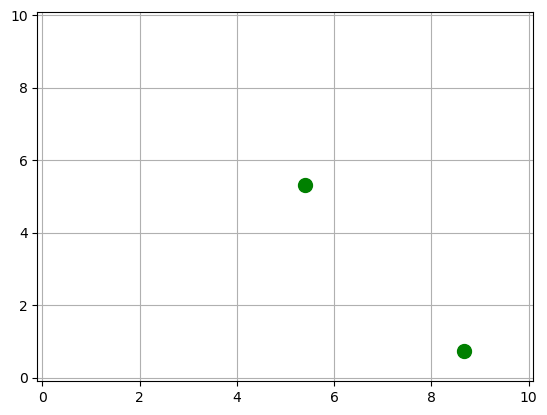

game done :), winner: C
this took 19.64125418663025 seconds


In [10]:
#code 9
##Main code
import time
t0 = time.time()

def startpos(num):
    xa = np.full((2*num), -1, dtype=float)
    ya = np.full((2*num), -1, dtype=float) 
    xb = np.full((2*num), -1, dtype=float)  
    yb = np.full((2*num), -1, dtype=float) 
    xc = np.full((2*num), -1, dtype=float)   
    yc = np.full((2*num), -1, dtype=float)  
    for i in range(num):
        xa[i] = round(random.uniform(0, 10),2)
        ya[i] = round(random.uniform(0, 10),2)
        xb[i] = round(random.uniform(0, 10),2)
        yb[i] = round(random.uniform(0, 10),2)
        xc[i] = round(random.uniform(0, 10),2)
        yc[i] = round(random.uniform(0, 10),2)
    return xa,ya,xb,yb,xc,yc

def values(x,y,thetalist,speedlist,character1,character2,character3,line1,line2,line3):
    if ( x!= -1 and thetalist[character3,line3] == 0):
        thetalist[character3,line3] = round(random.uniform(0, 2*np.pi),2)
        speedlist[character3,line3] = round(random.uniform(1/4, 1/2),2)
    #elif (character1!=character2 and thetalist[character3,line3] == 0):
    if (thetalist[character3,line3] != 0):   
        x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
        y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
        if (x > 10 or x < 0):
            x = x - (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y - (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
            thetalist[character3,line3] = np.pi - thetalist[character3,line3]
            x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
        if (y > 10 or y < 0):
            x = x - (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y - (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
            thetalist[character3,line3] = 2*np.pi - thetalist[character3,line3]
            x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
    return x,y

def valuesinterm(xa,ya,xb,yb,xc,yc,thetalist,speedlist,num):
    for i in range(2*num):
        xa[i],ya[i] = values(xa[i],ya[i],thetalist,speedlist,0,0,0,i,i,i)
        xb[i],yb[i] = values(xb[i],yb[i],thetalist,speedlist,1,1,1,i,i,i)
        xc[i],yc[i] = values(xc[i],yc[i],thetalist,speedlist,2,2,2,i,i,i)
    return xa,ya,xb,yb,xc,yc

def sametypecollisions(x,y,thetalist,speedlist,character,num):
    count = 0
    for i in range(2*num):
        for j in range(2*num):
            if (0< abs(x[i]-x[j]) + abs(y[i]-y[j])<0.4 and i!=j):
               # print('sametypecol')
                thetalist[character,i] = 2*np.pi-thetalist[character,i]
                thetalist[character,j] = 2*np.pi-thetalist[character,j]
                count=1
    return count, thetalist


def differentypecollisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num):
    diff_ab = []
    for i in range(2*num):
        for j in range(2*num):
            diff_ab.append(abs(xa[i] - xb[j]) + abs(ya[i] - yb[j]))
    diff_ac = []
    for i in range(2*num):
        for j in range(2*num):
            diff_ac.append(abs(xa[i] - xc[j]) + abs(ya[i] - yc[j]))
    diff_cb = []
    for i in range(2*num):
        for j in range(2*num):
            diff_cb.append(abs(xc[i] - xb[j]) + abs(yc[i] - yb[j]))
    for i in range(4*num*num):
        if (0!= diff_ab[i] < radius):
            #print('a and b',i)
            xc[num+c_num] = xa[int(i/(2*num))]
            yc[num+c_num] = ya[int(i/(2*num))] 
            thetalist[2,num+c_num] = (thetalist[0,int(i/(2*num))] + thetalist[1,i%(2*num)])/2
            speedlist[2,num+c_num] = (speedlist[0,int(i/(2*num))] + speedlist[1,i%(2*num)])/2
            c_num+=1
            xa[int(i/(2*num))] = ya[int(i/(2*num))] = xb[i%(2*num)] = yb[i%(2*num)] = -1
            thetalist[0,int(i/(2*num))] = thetalist[1,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    
        elif (0!= diff_ac[i] < radius):
            #print('a and c',i)
            xb[num+b_num] = xa[int(i/(2*num))]
            yb[num+b_num] = ya[int(i/(2*num))] 
            thetalist[1,num+b_num] = (thetalist[0,int(i/(2*num))] + thetalist[2,i%(2*num)])/2
            speedlist[1,num+b_num] = (speedlist[0,int(i/(2*num))] + speedlist[2,i%(2*num)])/2
            b_num+=1
            xa[int(i/(2*num))] = ya[int(i/(2*num))] = xc[i%(2*num)] = yc[i%(2*num)] = -1
            thetalist[0,int(i/(2*num))] = thetalist[2,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    
        elif (0!= diff_cb[i] < radius):
            #print('c and b',i)
            xa[num+a_num] = xc[int(i/(2*num))]
            ya[num+a_num] = yc[int(i/(2*num))] 
            thetalist[0,num+a_num] = (thetalist[2,int(i/(2*num))] + thetalist[1,i%(2*num)])/2
            speedlist[0,num+a_num] = (speedlist[2,int(i/(2*num))] + speedlist[1,i%(2*num)])/2
            a_num +=1
            xc[int(i/(2*num))] = yc[int(i/(2*num))] = xb[i%(2*num)] = yb[i%(2*num)] = -1
            thetalist[2,int(i/(2*num))] = thetalist[1,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    return a_num, b_num, c_num,thetalist

def collisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num):
    count_a = sametypecollisions(xa,ya,thetalist,speedlist,0,num)[0]
    count_b = sametypecollisions(xb,yb,thetalist,speedlist,1,num)[0]
    count_c = sametypecollisions(xc,yc,thetalist,speedlist,2,num)[0]
    total = count_a + count_b + count_c
    a_num,b_num,c_num,thetalist = differentypecollisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num)[0:4]
    return total,a_num,b_num,c_num,thetalist 

def gameender(xa,xb,xc,num):
    variable1 = 0
    variable2 = 0
    for i in range(2*num):
        if (xa[i] != -1):
            variable2 +=1
            winner = 'A'
            break
    for i in range(2*num):
        if (xb[i] != -1):
            variable2 +=1
            winner = 'B'
            break
    for i in range(2*num):
        if (xc[i] != -1):
            variable2 +=1
            winner = 'C'
            break
    if (variable2 == 1):
        return winner
    return 0

def replot(xa,ya,xb,yb,xc,yc,A,B,C,num):
    for i in range(num - A):
        xa[i] = -1
        ya[i] = -1
    for i in range(num - B):
        xb[i] = -1
        yb[i] = -1
    for i in range(num - C):
        xc[i] = -1
        yc[i] = -1
    return xa,ya,xb,yb,xc,yc

def plotter(A,B,C,radius):
    num = max(A,B,C)
    a_num,b_num,c_num = 0,0,0
    thetalist = np.zeros([3,2*num])
    speedlist = np.zeros([3,2*num])
    xa,ya,xb,yb,xc,yc = startpos(num)
    xa,ya,xb,yb,xc,yc = replot(xa,ya,xb,yb,xc,yc,A,B,C,num)
    while gameender(xa,xb,xc,num)==0:
        clear_output(wait=True)
        valuesinterm(xa,ya,xb,yb,xc,yc,thetalist,speedlist,num)
        a_num,b_num,c_num,thetalist = collisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num)[1:5]
        plt.scatter(xa,ya,100*radius, color = 'red')
        plt.scatter(xb,yb,100*radius, color = 'blue')
        plt.scatter(xc,yc,100*radius, color = 'green')
        plt.xlim(-0.1,10.1) 
        plt.ylim(-0.1,10.1) 
        plt.grid('on')
        plt.show()
        plt.pause(0.001)
    return print('game done :), winner:', gameender(xa,xb,xc,num))

#plotter(num of A, num of B, num of C, radius of collision)
plotter(2,2,2,1)

t1 = time.time()
print('this took', t1-t0, 'seconds')

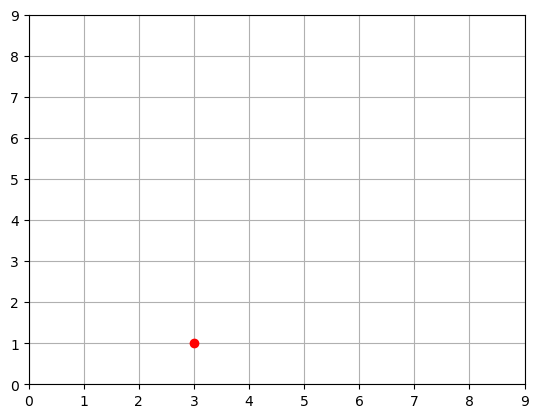

In [698]:
#code 1 ##the way I managed to print a moving graph
for i in range(10):
    clear_output(wait=True)
    x = random.randint(1, 8)
    y = random.randint(1, 8)
    plt.plot(x,y, 'o-', color = 'red')
    plt.yticks(np.arange(0,10)) 
    plt.xticks(np.arange(0,10)) 
    plt.grid('on')
    plt.show()
    

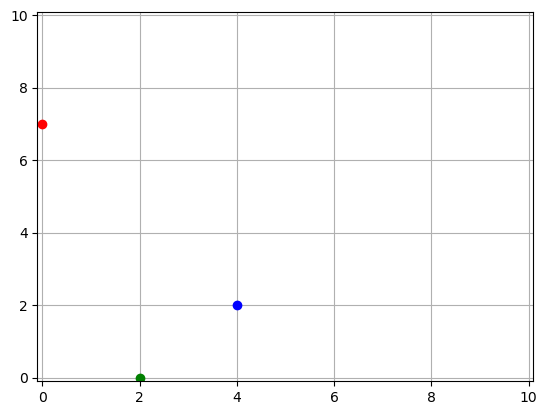

In [704]:
#code 2 a progression
##start positions of the particles so none overlap
def startpos():
    xa = random.randint(0, 9) 
    ya = random.randint(0, 9)
    xb = random.randint(0, 9)
    yb = random.randint(0, 9)
    xc = random.randint(0, 9)
    yc = random.randint(0, 9)
    while (xb == xa and yb == ya):
        xb = random.randint(0, 9)
        yb = random.randint(0, 9)
    while ((xc == xa and yc == ya) or (xc == xb and yc == yb)):
        xc = random.randint(0, 9)
        yc = random.randint(0, 9)
    return xa,ya,xb,yb,xc,yc

    
def plotter():
    xa,ya,xb,yb,xc,yc = startpos()
    for i in range(10):
        clear_output(wait=True)
        #values(xa,ya,xb,yb,xc,yc)
        ##later I will make this function to plot the paths of the particles, instead of the code below
        xa = (xa + 1) % 11
        ya = (ya + 1) % 11
        xb = (xb + 1) % 11
        yb = (yb + 1) % 11
        xc = (xc + 1) % 11
        yc = (yc + 1) % 11
        plt.plot(xa,ya, 'o-', color = 'red')
        plt.plot(xb,yb, 'o-', color = 'blue')
        plt.plot(xc,yc, 'o-', color = 'green')
        plt.xlim(-0.1,10.1) 
        plt.ylim(-0.1,10.1) 
        plt.grid('on')
        plt.show()
        plt.pause(0.001) 
        
plotter()

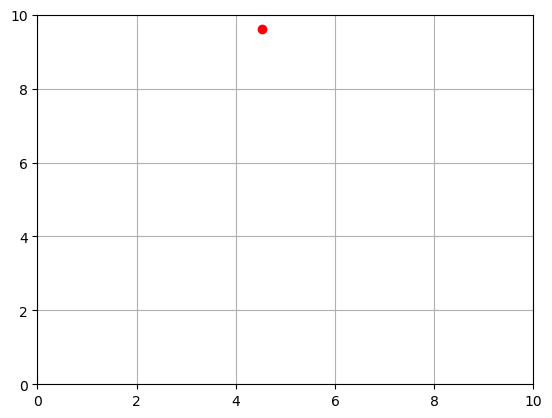

In [706]:
#code 3
##how my values function will work
reps = 50
x = np.zeros(reps)
y = np.zeros(reps)
x[0] = random.randint(0,10)
y[0] = random.randint(0,10)
    
def values(reps,x,y):
    theta = round(random.uniform(0, 2*np.pi),2)
    speed = round(random.uniform(0, 1),2)
    for i in range(reps-1):
        x[i+1] = x[i] + (speed)*(np.cos(theta))
        y[i+1] = y[i] + (speed)*(np.sin(theta))
        if (x[i+1] > 10 or x[i+1] < 0):
            theta = np.pi - theta
            x[i+1] = x[i] + (speed)*(np.cos(theta))
            y[i+1] = y[i] + (speed)*(np.sin(theta))
        if (y[i+1] > 10 or y[i+1] < 0):
            theta = 2*np.pi - theta
            x[i+1] = x[i] + (speed)*(np.cos(theta))
            y[i+1] = y[i] + (speed)*(np.sin(theta))
    return x,y

x,y = values(reps,x,y)
for i in range(reps):
        clear_output(wait=True)
        plt.scatter(x[i],y[i], color = 'red')
        plt.xlim(0,10) 
        plt.ylim(0,10) 
        plt.grid('on')
        plt.show()
        plt.pause(0.001)
        


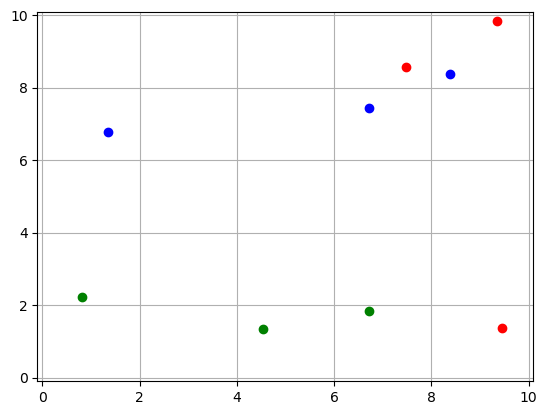

In [708]:
#code 4
##putting these codes together
reps = 50
num = 3 #number of each particle type


def startpos(reps,num): # I have editted this original function as I now need the outputs at arrays
    xa = np.zeros([reps,num]) 
    ya = np.zeros([reps,num]) 
    xb = np.zeros([reps,num])
    yb = np.zeros([reps,num]) 
    xc = np.zeros([reps,num]) 
    yc = np.zeros([reps,num])
    for i in range(num):
        xa[0,i] = round(random.uniform(0, 10),2)
        ya[0,i] = round(random.uniform(0, 10),2)
        xb[0,i] = round(random.uniform(0, 10),2)
        yb[0,i] = round(random.uniform(0, 10),2)
        xc[0,i] = round(random.uniform(0, 10),2)
        yc[0,i] = round(random.uniform(0, 10),2)
    return xa,ya,xb,yb,xc,yc

def values(reps,x,y):
    theta = round(random.uniform(0, 2*np.pi),2)
    speed = round(random.uniform(0, 1),2)
    for i in range(reps-1):
        x[i+1] = x[i] + (speed)*(np.cos(theta))
        y[i+1] = y[i] + (speed)*(np.sin(theta))
        if (x[i+1] > 10 or x[i+1] < 0):
            theta = np.pi - theta
            x[i+1] = x[i] + (speed)*(np.cos(theta))
            y[i+1] = y[i] + (speed)*(np.sin(theta))
        if (y[i+1] > 10 or y[i+1] < 0):
            theta = 2*np.pi - theta
            x[i+1] = x[i] + (speed)*(np.cos(theta))
            y[i+1] = y[i] + (speed)*(np.sin(theta))
    return x,y

def plotter(reps):
    xa,ya,xb,yb,xc,yc = startpos(reps,num)
    for j in range(num):
        xa[:,j], ya[:,j] = values(reps,xa[:,j],ya[:,j])
        xb[:,j], yb[:,j] = values(reps,xb[:,j],yb[:,j])
        xc[:,j], yc[:,j] = values(reps,xc[:,j],yc[:,j])
    for i in range(reps):
        clear_output(wait=True)
        plt.scatter(xa[i],ya[i], color = 'red')
        plt.scatter(xb[i],yb[i], color = 'blue')
        plt.scatter(xc[i],yc[i], color = 'green')
        plt.xlim(-0.1,10.1) 
        plt.ylim(-0.1,10.1) 
        plt.grid('on')
        plt.show()
        plt.pause(0.03) 
        
plotter(reps)

In [711]:
#code 5
##make a function describing collision
##skip this it doesn't work
reps = 60
num = 3

def startpos(reps,num):
    xa = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num) 
    ya = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num)  
    xb = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num) 
    yb = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num)  
    xc = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num) 
    yc = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num) 
    for i in range(num):
        xa[0,i] = round(random.uniform(0, 10),2)
        ya[0,i] = round(random.uniform(0, 10),2)
        xb[0,i] = round(random.uniform(0, 10),2)
        yb[0,i] = round(random.uniform(0, 10),2)
        xc[0,i] = round(random.uniform(0, 10),2)
        yc[0,i] = round(random.uniform(0, 10),2)
    return xa,ya,xb,yb,xc,yc

thetalist = np.zeros(2*reps,num)
thetalist = np.zeros(2*reps,num)

def values(reps,x,y,thetalist,speedlist):
    for i in range(num):
        if (var[i] != 0):
            theta = (thetalist[k]+thetalist[l])/2
            speed = (speedlist[k]+speedlist[l])/2
            for e in range(reps):
                while x[e] == 0:
                    startofzeros = e
            for i in range(startofzeros,reps-1):
                x[i+1] = x[i] + (speed)*(np.cos(theta))
                y[i+1] = y[i] + (speed)*(np.sin(theta))
                if (x[i+1] > 10 or x[i+1] < 0):
                    theta = np.pi - theta
                    x[i+1] = x[i] + (speed)*(np.cos(theta))
                    y[i+1] = y[i] + (speed)*(np.sin(theta))
                if (y[i+1] > 10 or y[i+1] < 0):
                    theta = 2*np.pi - theta
                    x[i+1] = x[i] + (speed)*(np.cos(theta))
                    y[i+1] = y[i] + (speed)*(np.sin(theta))
    #else:
    theta = round(random.uniform(0, 2*np.pi),2)
    speed = round(random.uniform(0.1, 1/3),2)
    thetalist.append(theta)
    speedlist.append(speed)
    for i in range(reps-1):
        x[i+1] = x[i] + (speed)*(np.cos(theta))
        y[i+1] = y[i] + (speed)*(np.sin(theta))
        if (x[i+1] > 10 or x[i+1] < 0):
            theta = np.pi - theta
            x[i+1] = x[i] + (speed)*(np.cos(theta))
            y[i+1] = y[i] + (speed)*(np.sin(theta))
        if (y[i+1] > 10 or y[i+1] < 0):
            theta = 2*np.pi - theta
            x[i+1] = x[i] + (speed)*(np.cos(theta))
            y[i+1] = y[i] + (speed)*(np.sin(theta))
    return x,y

def plotter(reps):
    xa,ya,xb,yb,xc,yc = startpos(reps,num)
    for j in range(num):
        xa[:,j], ya[:,j] = values(reps,xa[:,j],ya[:,j], var,0,0,thetalist,speedlist)
        xb[:,j], yb[:,j] = values(reps,xb[:,j],yb[:,j], var,0,0,thetalist,speedlist)
        xc[:,j], yc[:,j] = values(reps,xc[:,j],yc[:,j], var,0,0,thetalist,speedlist)     
    for i in range(reps):
        clear_output(wait=True)
        collision(xa,ya,xb,yb,xc,yc,i,var,thetalist,speedlist)
        plt.scatter(xa[i],ya[i], color = 'red')
        plt.scatter(xb[i],yb[i], color = 'blue')
        plt.scatter(xc[i],yc[i], color = 'green')
        plt.scatter(xc[i,3],yc[i,3], color = 'purple')
        plt.xlim(-0.1,10.1) 
        plt.ylim(-0.1,10.1) 
        plt.grid('on')
        plt.show()
        if (collision(xa,ya,xb,yb,xc,yc,i, var ,thetalist,speedlist)[0] == 1):
            plt.pause(1)
        plt.pause(0.1) 



def collision(xa,ya,xb,yb,xc,yc,i,thetalist,speedlist):
    rounded = []
    for j in range(num):
        rounded.append(xa[i,j])
        rounded.append(ya[i,j])
        rounded.append(xb[i,j])
        rounded.append(yb[i,j])
        rounded.append(xc[i,j])
        rounded.append(yc[i,j])
    for k in range(3*num):
        for l in range(3*num):
            if (round(rounded[2*k]) == round(rounded[2*l]) and k!=l and round(rounded[2*k+1]) == round(rounded[2*l+1])):
                if (abs(rounded[2*k] - rounded[2*l]) + abs(rounded[2*k+1] - rounded[2*l+1]) < 0.4):
                    if(k % 3 == l % 3):
                        print('same particle type collision, particle type:', chr(97+(k%3)))
                        return 1,0,0,0,0
                    else:
                        print('collision')
                        if ((k*l)%3 == 0 and (k+l)%3 == 1):
                            print('c')
                            var[2] += 1
                            if (k % 3 == 0):
                                #for d in range(i):
                                 #   xc[d,3] == xa[d,int(k/3)]
                                  #  yc[d,3] == ya[d,int(k/3)]
                                for i in range(reps):
                                    xc[i,3] = 5
                                    yc[i,3] = 5
                                for m in range(reps):
                                    xa[m,int(k/3)] = -1
                                    ya[m,int(k/3)] = -1
                                    xb[m,int((l-1)/3)] = -2
                                    yb[m,int((l-1)/3)] = -2
                            else:
                                for d in range(i+1):
                                    xc[d,3] == xa[d,int(l/3)]
                                    yc[d,3] == ya[d,int(l/3)]
                                for m in range(reps):
                                    xb[m,int((k-1)/3)] = -1
                                    yb[m,int((k-1)/3)] = -1
                                    xa[m,int(l/3)] = -2
                                    ya[m,int(l/3)] = -2
                            values(reps,xc[:,3],yc[:,3],var,k,l,thetalist,speedlist)
                            print(k,l)
                            return 1,2,var,k,l
                            #var
                        elif ((k*l)%3 == 0 and (k+l)%3 == 2):
                            print('b')
                            var[1] += 1
                            return 1,1,var,k,l
                        else:
                            print('a') 
                            var[0] +=1
                            return 1,0,var,k,l
    return 0,0,0,0,0
                
            
plotter(reps)

TypeError: Cannot interpret '3' as a data type

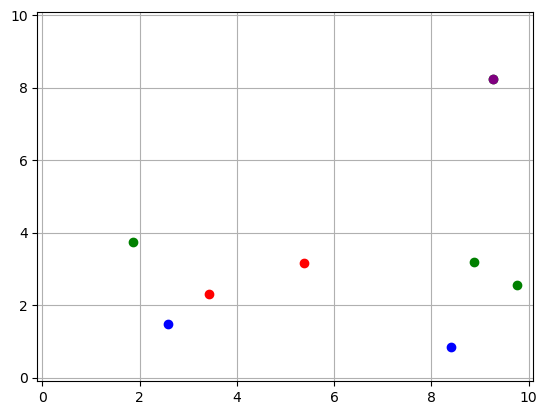

In [712]:
##code 6
#a failed attempt

reps = 100
num = 3

def startpos(reps,num):
    xa = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num) 
    ya = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num)  
    xb = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num) 
    yb = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num)  
    xc = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num) 
    yc = np.full((reps*2*num), -1, dtype=float).reshape(reps, 2*num) 
    for i in range(num):
        xa[0,i] = round(random.uniform(0, 10),2)
        ya[0,i] = round(random.uniform(0, 10),2)
        xb[0,i] = round(random.uniform(0, 10),2)
        yb[0,i] = round(random.uniform(0, 10),2)
        xc[0,i] = round(random.uniform(0, 10),2)
        yc[0,i] = round(random.uniform(0, 10),2)
    return xa,ya,xb,yb,xc,yc

thetalist = np.zeros([reps,3,2*num])
speedlist = np.zeros([reps,3,2*num])

def values(reps,x,y,character,character2,character3,line,line2,line3,thetalist,speedlist,j):
    theta = (thetalist[j,character,line]+thetalist[j,character2,line2])/2
    speed = (speedlist[j,character,line]+speedlist[j,character2,line2])/2
    if (theta == 0):
        theta = round(random.uniform(0, 2*np.pi),2)
        speed = round(random.uniform(0.1, 1/3),2)
    for m in range(j,reps):
        thetalist[m,character3,line3] = theta
        speedlist[m,character3,line3] = speed
    for i in range(j,reps-1):
        x[i+1] = x[i] + (speed)*(np.cos(theta))
        y[i+1] = y[i] + (speed)*(np.sin(theta))
        if (x[i+1] > 10 or x[i+1] < 0):
            theta = np.pi - theta
            for m in range(j,reps):
                thetalist[m,character3,line3] = theta
            x[i+1] = x[i] + (speed)*(np.cos(theta))
            y[i+1] = y[i] + (speed)*(np.sin(theta))
        if (y[i+1] > 10 or y[i+1] < 0):
            theta = 2*np.pi - theta
            for m in range(j,reps):
                thetalist[m,character3,line3] = theta
            x[i+1] = x[i] + (speed)*(np.cos(theta))
            y[i+1] = y[i] + (speed)*(np.sin(theta))
    return x,y

def plotter(reps,thetalist,speedlist):
    xa,ya,xb,yb,xc,yc = startpos(reps,num)
    for j in range(num):
        xa[:,j], ya[:,j] = values(reps,xa[:,j],ya[:,j],0,0,0,j,j,j,thetalist,speedlist,0)
        xb[:,j], yb[:,j] = values(reps,xb[:,j],yb[:,j],1,1,1,j,j,j,thetalist,speedlist,0)
        xc[:,j], yc[:,j] = values(reps,xc[:,j],yc[:,j],2,2,2,j,j,j,thetalist,speedlist,0) 
    for i in range(reps):
        clear_output(wait=True)
        collision(xa,ya,xb,yb,xc,yc,i,thetalist,speedlist)
        if xc[i,3] == -1:
            xc[:,3],yc[:,3] = collision(xa,ya,xb,yb,xc,yc,i,thetalist,speedlist)[3:5]
        plt.scatter(xa[i],ya[i], color = 'red')
        plt.scatter(xb[i],yb[i], color = 'blue')
        plt.scatter(xc[i],yc[i], color = 'green')
        plt.scatter(xc[i,3],yc[i,3], color = 'purple')
        plt.xlim(-0.1,10.1) 
        plt.ylim(-0.1,10.1) 
        plt.grid('on')
        plt.show()
        if (collision(xa,ya,xb,yb,xc,yc,i,thetalist,speedlist)[0] == 1):
            plt.pause(0.3)
        plt.pause(0.1) 

def collision(xa,ya,xb,yb,xc,yc,i,thetalist,speedlist):
    rounded = []
    for j in range(2*num):
        rounded.append(xa[i,j])
        rounded.append(ya[i,j])
        rounded.append(xb[i,j])
        rounded.append(yb[i,j])
        rounded.append(xc[i,j])
        rounded.append(yc[i,j])
    for k in range(num*6):
        for l in range(num*6):
            if ((abs(rounded[2*k] - rounded[2*l]) + abs(rounded[2*k+1] - rounded[2*l+1])) < 0.4 and k!=l and (rounded[2*k]!=-1 and rounded[2*l]!=-1)):        
                #there is a collision
                if (k % 3 == l % 3):
                    print('same particle type collision, particle type:', chr(97+(k%3)),k,l)
                    return 1,0,0,np.full((reps), -1, dtype=float),np.full((reps), -1, dtype=float)
                else:
                    print('collision between', chr(97+(k%3)), chr(97+(l%3)))
                    ##case 1: a and b
                    if ((k*l)%3 == 0 and (k+l)%3 == 1):
                        if (k%3 == 0):
                            for z in range(reps):
                                xc[z,3] = xa[z,int(k/3)]
                                yc[z,3] = ya[z,int(k/3)]
                                xa[z,int(k/3)] = -1
                                xb[z,int((l-1)/3)] = -1
                            xc[:,3], yc[:,3] = values(reps,xc[:,3],yc[:,3],0,1,2,int(k/3),int((l-1)/3),3,thetalist,speedlist,i)
                            return 1,xa[:,int(k/3)],xb[:,int((l-1)/3)], xc[:,3], yc[:,3]
                        else:
                            for z in range(reps):
                                xc[z,3] = xa[z,int(l/3)]
                                yc[z,3] = ya[z,int(l/3)]
                                xa[z,int(l/3)] = -1
                                xb[z,int((k-1)/3)] = -1
                            xc[:,3], yc[:,3] = values(reps,xc[:,3],yc[:,3],0,1,2,int(l/3),int((k-1)/3),3,thetalist,speedlist,i)
                            return 1,xa[:,int(l/3)],xb[:,int((k-1)/3)], xc[:,3], yc[:,3]
                        ##case 2: a and c
                    ##case 3: b and c
                    return 1,0,0,np.full((reps), -1, dtype=float),np.full((reps), -1, dtype=float)
                    
    else:
        return 0,0,0,np.full((reps), -1, dtype=float),np.full((reps), -1, dtype=float)
        
                
                
                

plotter(reps,thetalist,speedlist)

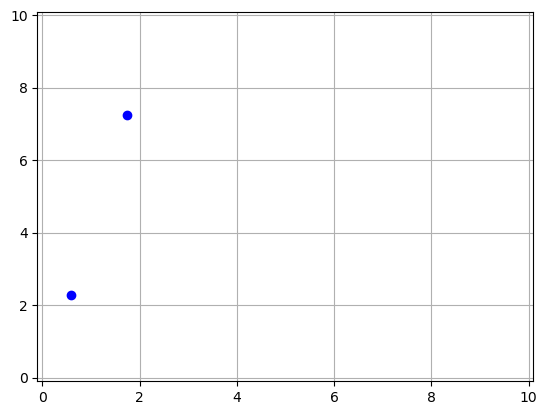

game done :)


In [715]:
##code 7
##completed code
#ucbbaaaaaa finally

num = 6
thetalist = np.zeros([3,2*num])
speedlist = np.zeros([3,2*num])

def startpos(num):
    xa = np.full((2*num), -1, dtype=float) ##the key difference is making it so that the values are calculated along the way through a function
    ya = np.full((2*num), -1, dtype=float) ##in place of calculating the path at the start. Each xa[i] is a real number, not an array  
    xb = np.full((2*num), -1, dtype=float)  
    yb = np.full((2*num), -1, dtype=float) 
    xc = np.full((2*num), -1, dtype=float)   
    yc = np.full((2*num), -1, dtype=float)  
    for i in range(num):
        xa[i] = round(random.uniform(0, 10),2)
        ya[i] = round(random.uniform(0, 10),2)
        xb[i] = round(random.uniform(0, 10),2)
        yb[i] = round(random.uniform(0, 10),2)
        xc[i] = round(random.uniform(0, 10),2)
        yc[i] = round(random.uniform(0, 10),2)
    return xa,ya,xb,yb,xc,yc

def values(x,y,thetalist,speedlist,character1,character2,character3,line1,line2,line3):
    if ( x!= -1 and thetalist[character3,line3] == 0):
        thetalist[character3,line3] = round(random.uniform(0, 2*np.pi),2)
        speedlist[character3,line3] = round(random.uniform(0, 1/3),2)
    #elif (character1!=character2 and thetalist[character3,line3] == 0):
    if (thetalist[character3,line3] != 0):   
        x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
        y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
        if (x > 10 or x < 0):
            x = x - (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y - (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
            thetalist[character3,line3] = np.pi - thetalist[character3,line3]
            x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
        if (y > 10 or y < 0):
            x = x - (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y - (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
            thetalist[character3,line3] = 2*np.pi - thetalist[character3,line3]
            x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
    return x,y

def valuesinterm(xa,ya,xb,yb,xc,yc,thetalist,speedlist):
    for i in range(2*num):
        xa[i],ya[i] = values(xa[i],ya[i],thetalist,speedlist,0,0,0,i,i,i)
        xb[i],yb[i] = values(xb[i],yb[i],thetalist,speedlist,1,1,1,i,i,i)
        xc[i],yc[i] = values(xc[i],yc[i],thetalist,speedlist,2,2,2,i,i,i)
    return xa,ya,xb,yb,xc,yc

def sametypecollisions(x,y,thetalist,speedlist,character):
    count = 0
    for i in range(2*num):
        for j in range(2*num):
            if (0< abs(x[i]-x[j]) + abs(y[i]-y[j])<0.4 and i!=j):
               # print('sametypecol')
                thetalist[character,i] = 2*np.pi-thetalist[character,i]
                thetalist[character,j] = 2*np.pi-thetalist[character,j]
                count=1
    return count, thetalist


def differentypecollisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num):
    diff_ab = []
    for i in range(2*num):
        for j in range(2*num):
            diff_ab.append(abs(xa[i] - xb[j]) + abs(ya[i] - yb[j]))
    diff_ac = []
    for i in range(2*num):
        for j in range(2*num):
            diff_ac.append(abs(xa[i] - xc[j]) + abs(ya[i] - yc[j]))
    diff_cb = []
    for i in range(2*num):
        for j in range(2*num):
            diff_cb.append(abs(xc[i] - xb[j]) + abs(yc[i] - yb[j]))
    for i in range(4*num*num):
        if (0!= diff_ab[i] < 0.4):
            #print('a and b',i)
            xc[num+c_num] = xa[int(i/(2*num))]
            yc[num+c_num] = ya[int(i/(2*num))] 
            thetalist[2,num+c_num] = (thetalist[0,int(i/(2*num))] + thetalist[1,i%(2*num)])/2
            speedlist[2,num+c_num] = (speedlist[0,int(i/(2*num))] + speedlist[1,i%(2*num)])/2
            c_num+=1
            xa[int(i/(2*num))] = ya[int(i/(2*num))] = xb[i%(2*num)] = yb[i%(2*num)] = -1
            thetalist[0,int(i/(2*num))] = thetalist[1,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    
        elif (0!= diff_ac[i] < 0.4):
            #print('a and c',i)
            xb[num+b_num] = xa[int(i/(2*num))]
            yb[num+b_num] = ya[int(i/(2*num))] 
            thetalist[1,num+b_num] = (thetalist[0,int(i/(2*num))] + thetalist[2,i%(2*num)])/2
            speedlist[1,num+b_num] = (speedlist[0,int(i/(2*num))] + speedlist[2,i%(2*num)])/2
            b_num+=1
            xa[int(i/(2*num))] = ya[int(i/(2*num))] = xc[i%(2*num)] = yc[i%(2*num)] = -1
            thetalist[0,int(i/(2*num))] = thetalist[2,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    
        elif (0!= diff_cb[i] < 0.4):
            #print('c and b',i)
            xa[num+a_num] = xc[int(i/(2*num))]
            ya[num+a_num] = yc[int(i/(2*num))] 
            thetalist[0,num+a_num] = (thetalist[2,int(i/(2*num))] + thetalist[1,i%(2*num)])/2
            speedlist[0,num+a_num] = (speedlist[2,int(i/(2*num))] + speedlist[1,i%(2*num)])/2
            a_num +=1
            xc[int(i/(2*num))] = yc[int(i/(2*num))] = xb[i%(2*num)] = yb[i%(2*num)] = -1
            thetalist[2,int(i/(2*num))] = thetalist[1,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    return a_num, b_num, c_num,thetalist

def collisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num):
    count_a = sametypecollisions(xa,ya,thetalist,speedlist,0)[0]
    count_b = sametypecollisions(xb,yb,thetalist,speedlist,1)[0]
    count_c = sametypecollisions(xc,yc,thetalist,speedlist,2)[0]
    total = count_a + count_b + count_c
    a_num,b_num,c_num,thetalist = differentypecollisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num)[0:4]
    return total,a_num,b_num,c_num,thetalist 

def gameender(xa,xb,xc):
    variable1 = 0
    variable2 = 0
    for i in range(2*num):
        if (xa[i] != -1):
            variable2 +=1
            break
    for i in range(2*num):
        if (xb[i] != -1):
            variable2 +=1
            break
    for i in range(2*num):
        if (xc[i] != -1):
            variable2 +=1
            break
    if (variable2 == 1):
        return 1
    return 0

def plotter(thetalist):
    a_num,b_num,c_num = 0,0,0
    xa,ya,xb,yb,xc,yc = startpos(num)
    while gameender(xa,xb,xc)==0:
        clear_output(wait=True)
        valuesinterm(xa,ya,xb,yb,xc,yc,thetalist,speedlist)
        a_num,b_num,c_num,thetalist = collisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num)[1:5]
        plt.scatter(xa,ya, color = 'red')
        plt.scatter(xb,yb, color = 'blue')
        plt.scatter(xc,yc, color = 'green')
        plt.xlim(-0.1,10.1) 
        plt.ylim(-0.1,10.1) 
        plt.grid('on')
        plt.show()
        plt.pause(0.001)
    return print('game done :)')
    
plotter(thetalist)

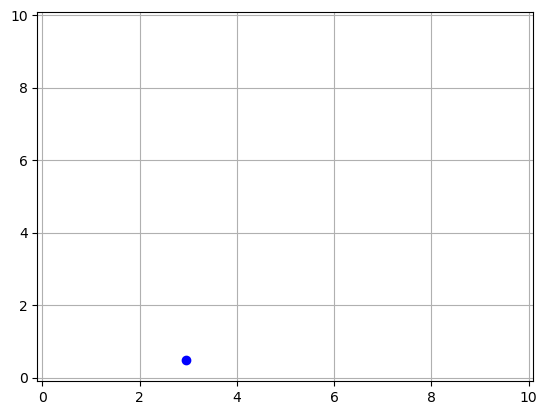

game done :)


In [718]:
##code 8
A,B,C = 3,4,5
num = max(A,B,C)

thetalist = np.zeros([3,2*num])
speedlist = np.zeros([3,2*num])

def startpos(num):
    xa = np.full((2*num), -1, dtype=float) 
    ya = np.full((2*num), -1, dtype=float) 
    xb = np.full((2*num), -1, dtype=float)  
    yb = np.full((2*num), -1, dtype=float) 
    xc = np.full((2*num), -1, dtype=float)   
    yc = np.full((2*num), -1, dtype=float)  
    for i in range(num):
        xa[i] = round(random.uniform(0, 10),2)
        ya[i] = round(random.uniform(0, 10),2)
        xb[i] = round(random.uniform(0, 10),2)
        yb[i] = round(random.uniform(0, 10),2)
        xc[i] = round(random.uniform(0, 10),2)
        yc[i] = round(random.uniform(0, 10),2)
    return xa,ya,xb,yb,xc,yc

def values(x,y,thetalist,speedlist,character1,character2,character3,line1,line2,line3):
    if ( x!= -1 and thetalist[character3,line3] == 0):
        thetalist[character3,line3] = round(random.uniform(0, 2*np.pi),2)
        speedlist[character3,line3] = round(random.uniform(0, 1/3),2)
    if (thetalist[character3,line3] != 0):   
        x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
        y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
        if (x > 10 or x < 0):
            x = x - (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y - (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
            thetalist[character3,line3] = np.pi - thetalist[character3,line3]
            x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
        if (y > 10 or y < 0):
            x = x - (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y - (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
            thetalist[character3,line3] = 2*np.pi - thetalist[character3,line3]
            x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
    return x,y

def valuesinterm(xa,ya,xb,yb,xc,yc,thetalist,speedlist):
    for i in range(2*num):
        xa[i],ya[i] = values(xa[i],ya[i],thetalist,speedlist,0,0,0,i,i,i)
        xb[i],yb[i] = values(xb[i],yb[i],thetalist,speedlist,1,1,1,i,i,i)
        xc[i],yc[i] = values(xc[i],yc[i],thetalist,speedlist,2,2,2,i,i,i)
    return xa,ya,xb,yb,xc,yc

def sametypecollisions(x,y,thetalist,speedlist,character):
    count = 0
    for i in range(2*num):
        for j in range(2*num):
            if (0< abs(x[i]-x[j]) + abs(y[i]-y[j])<0.4 and i!=j):
                thetalist[character,i] = 2*np.pi-thetalist[character,i]
                thetalist[character,j] = 2*np.pi-thetalist[character,j]
                count=1
    return count, thetalist


def differentypecollisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num):
    diff_ab = []
    for i in range(2*num):
        for j in range(2*num):
            diff_ab.append(abs(xa[i] - xb[j]) + abs(ya[i] - yb[j]))
    diff_ac = []
    for i in range(2*num):
        for j in range(2*num):
            diff_ac.append(abs(xa[i] - xc[j]) + abs(ya[i] - yc[j]))
    diff_cb = []
    for i in range(2*num):
        for j in range(2*num):
            diff_cb.append(abs(xc[i] - xb[j]) + abs(yc[i] - yb[j]))
    for i in range(4*num*num):
        if (0!= diff_ab[i] < 0.4):
            xc[num+c_num] = xa[int(i/(2*num))]
            yc[num+c_num] = ya[int(i/(2*num))] 
            thetalist[2,num+c_num] = (thetalist[0,int(i/(2*num))] + thetalist[1,i%(2*num)])/2
            speedlist[2,num+c_num] = (speedlist[0,int(i/(2*num))] + speedlist[1,i%(2*num)])/2
            c_num+=1
            xa[int(i/(2*num))] = ya[int(i/(2*num))] = xb[i%(2*num)] = yb[i%(2*num)] = -1
            thetalist[0,int(i/(2*num))] = thetalist[1,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    
        elif (0!= diff_ac[i] < 0.4):
            xb[num+b_num] = xa[int(i/(2*num))]
            yb[num+b_num] = ya[int(i/(2*num))] 
            thetalist[1,num+b_num] = (thetalist[0,int(i/(2*num))] + thetalist[2,i%(2*num)])/2
            speedlist[1,num+b_num] = (speedlist[0,int(i/(2*num))] + speedlist[2,i%(2*num)])/2
            b_num+=1
            xa[int(i/(2*num))] = ya[int(i/(2*num))] = xc[i%(2*num)] = yc[i%(2*num)] = -1
            thetalist[0,int(i/(2*num))] = thetalist[2,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    
        elif (0!= diff_cb[i] < 0.4):
            xa[num+a_num] = xc[int(i/(2*num))]
            ya[num+a_num] = yc[int(i/(2*num))] 
            thetalist[0,num+a_num] = (thetalist[2,int(i/(2*num))] + thetalist[1,i%(2*num)])/2
            speedlist[0,num+a_num] = (speedlist[2,int(i/(2*num))] + speedlist[1,i%(2*num)])/2
            a_num +=1
            xc[int(i/(2*num))] = yc[int(i/(2*num))] = xb[i%(2*num)] = yb[i%(2*num)] = -1
            thetalist[2,int(i/(2*num))] = thetalist[1,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    return a_num, b_num, c_num,thetalist

def collisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num):
    count_a = sametypecollisions(xa,ya,thetalist,speedlist,0)[0]
    count_b = sametypecollisions(xb,yb,thetalist,speedlist,1)[0]
    count_c = sametypecollisions(xc,yc,thetalist,speedlist,2)[0]
    total = count_a + count_b + count_c
    a_num,b_num,c_num,thetalist = differentypecollisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num)[0:4]
    return total,a_num,b_num,c_num,thetalist 

def gameender(xa,xb,xc):
    variable1 = 0
    variable2 = 0
    for i in range(2*num):
        if (xa[i] != -1):
            variable2 +=1
            break
    for i in range(2*num):
        if (xb[i] != -1):
            variable2 +=1
            break
    for i in range(2*num):
        if (xc[i] != -1):
            variable2 +=1
            break
    if (variable2 == 1):
        return 1
    return 0

def replot(xa,ya,xb,yb,xc,yc,A,B,C):
    for i in range(num - A):
        xa[i] = -1
        ya[i] = -1
    for i in range(num - B):
        xb[i] = -1
        yb[i] = -1
    for i in range(num - C):
        xc[i] = -1
        yc[i] = -1
    return xa,ya,xb,yb,xc,yc

def plotter(thetalist):
    a_num,b_num,c_num = 0,0,0
    xa,ya,xb,yb,xc,yc = startpos(num)
    xa,ya,xb,yb,xc,yc = replot(xa,ya,xb,yb,xc,yc,A,B,C)
    while gameender(xa,xb,xc)==0:
        clear_output(wait=True)
        valuesinterm(xa,ya,xb,yb,xc,yc,thetalist,speedlist)
        a_num,b_num,c_num,thetalist = collisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num)[1:5]
        plt.scatter(xa,ya, color = 'red')
        plt.scatter(xb,yb, color = 'blue')
        plt.scatter(xc,yc, color = 'green')
        plt.xlim(-0.1,10.1) 
        plt.ylim(-0.1,10.1) 
        plt.grid('on')
        plt.show()
        plt.pause(0.001)
    return print('game done :)')
    
plotter(thetalist)

In [3]:
#intermediate to make next work
times = []
scoreboard = [0,0,0]
finalnumber = np.zeros([4], int)

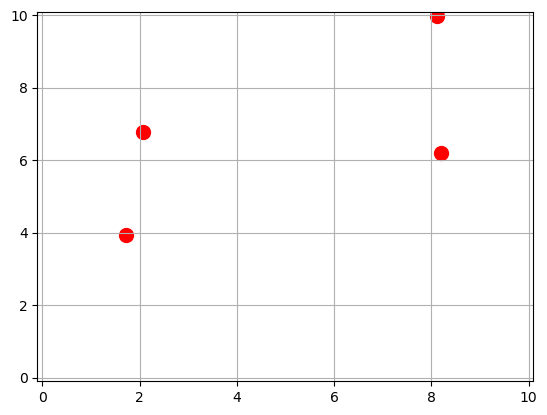

game done :)
this took 6.772443056106567 seconds
the average is 6.772443056106567
the scoreboard is [1, 0, 0]
the number of games completed is 1
[0 0 0 1]


In [4]:
#code 10
import time
t0 = time.time()

def startpos(num):
    xa = np.full((2*num), -1, dtype=float)
    ya = np.full((2*num), -1, dtype=float) 
    xb = np.full((2*num), -1, dtype=float)  
    yb = np.full((2*num), -1, dtype=float) 
    xc = np.full((2*num), -1, dtype=float)   
    yc = np.full((2*num), -1, dtype=float)  
    for i in range(num):
        xa[i] = round(random.uniform(0, 10),2)
        ya[i] = round(random.uniform(0, 10),2)
        xb[i] = round(random.uniform(0, 10),2)
        yb[i] = round(random.uniform(0, 10),2)
        xc[i] = round(random.uniform(0, 10),2)
        yc[i] = round(random.uniform(0, 10),2)
    return xa,ya,xb,yb,xc,yc

def values(x,y,thetalist,speedlist,character1,character2,character3,line1,line2,line3):
    if ( x!= -1 and thetalist[character3,line3] == 0):
        thetalist[character3,line3] = round(random.uniform(0, 2*np.pi),2)
        speedlist[character3,line3] = round(random.uniform(1/4, 1/2),2)
    #elif (character1!=character2 and thetalist[character3,line3] == 0):
    if (thetalist[character3,line3] != 0):   
        x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
        y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
        if (x > 10 or x < 0):
            x = x - (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y - (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
            thetalist[character3,line3] = np.pi - thetalist[character3,line3]
            x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
        if (y > 10 or y < 0):
            x = x - (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y - (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
            thetalist[character3,line3] = 2*np.pi - thetalist[character3,line3]
            x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
    return x,y

def valuesinterm(xa,ya,xb,yb,xc,yc,thetalist,speedlist,num):
    for i in range(2*num):
        xa[i],ya[i] = values(xa[i],ya[i],thetalist,speedlist,0,0,0,i,i,i)
        xb[i],yb[i] = values(xb[i],yb[i],thetalist,speedlist,1,1,1,i,i,i)
        xc[i],yc[i] = values(xc[i],yc[i],thetalist,speedlist,2,2,2,i,i,i)
    return xa,ya,xb,yb,xc,yc

def sametypecollisions(x,y,thetalist,speedlist,character,num):
    count = 0
    for i in range(2*num):
        for j in range(2*num):
            if (0< abs(x[i]-x[j]) + abs(y[i]-y[j])<0.4 and i!=j):
               # print('sametypecol')
                thetalist[character,i] = 2*np.pi-thetalist[character,i]
                thetalist[character,j] = 2*np.pi-thetalist[character,j]
                count=1
    return count, thetalist


def differentypecollisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num):
    diff_ab = []
    for i in range(2*num):
        for j in range(2*num):
            diff_ab.append(abs(xa[i] - xb[j]) + abs(ya[i] - yb[j]))
    diff_ac = []
    for i in range(2*num):
        for j in range(2*num):
            diff_ac.append(abs(xa[i] - xc[j]) + abs(ya[i] - yc[j]))
    diff_cb = []
    for i in range(2*num):
        for j in range(2*num):
            diff_cb.append(abs(xc[i] - xb[j]) + abs(yc[i] - yb[j]))
    for i in range(4*num*num):
        if (0!= diff_ab[i] < radius):
            #print('a and b',i)
            xc[num+c_num] = xa[int(i/(2*num))]
            yc[num+c_num] = ya[int(i/(2*num))] 
            thetalist[2,num+c_num] = (thetalist[0,int(i/(2*num))] + thetalist[1,i%(2*num)])/2
            speedlist[2,num+c_num] = (speedlist[0,int(i/(2*num))] + speedlist[1,i%(2*num)])/2
            c_num+=1
            xa[int(i/(2*num))] = ya[int(i/(2*num))] = xb[i%(2*num)] = yb[i%(2*num)] = -1
            thetalist[0,int(i/(2*num))] = thetalist[1,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    
        elif (0!= diff_ac[i] < radius):
            #print('a and c',i)
            xb[num+b_num] = xa[int(i/(2*num))]
            yb[num+b_num] = ya[int(i/(2*num))] 
            thetalist[1,num+b_num] = (thetalist[0,int(i/(2*num))] + thetalist[2,i%(2*num)])/2
            speedlist[1,num+b_num] = (speedlist[0,int(i/(2*num))] + speedlist[2,i%(2*num)])/2
            b_num+=1
            xa[int(i/(2*num))] = ya[int(i/(2*num))] = xc[i%(2*num)] = yc[i%(2*num)] = -1
            thetalist[0,int(i/(2*num))] = thetalist[2,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    
        elif (0!= diff_cb[i] < radius):
            #print('c and b',i)
            xa[num+a_num] = xc[int(i/(2*num))]
            ya[num+a_num] = yc[int(i/(2*num))] 
            thetalist[0,num+a_num] = (thetalist[2,int(i/(2*num))] + thetalist[1,i%(2*num)])/2
            speedlist[0,num+a_num] = (speedlist[2,int(i/(2*num))] + speedlist[1,i%(2*num)])/2
            a_num +=1
            xc[int(i/(2*num))] = yc[int(i/(2*num))] = xb[i%(2*num)] = yb[i%(2*num)] = -1
            thetalist[2,int(i/(2*num))] = thetalist[1,i%(2*num)] = 0
            return a_num, b_num, c_num,thetalist
    return a_num, b_num, c_num,thetalist

def collisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num):
    count_a = sametypecollisions(xa,ya,thetalist,speedlist,0,num)[0]
    count_b = sametypecollisions(xb,yb,thetalist,speedlist,1,num)[0]
    count_c = sametypecollisions(xc,yc,thetalist,speedlist,2,num)[0]
    total = count_a + count_b + count_c
    a_num,b_num,c_num,thetalist = differentypecollisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num)[0:4]
    return total,a_num,b_num,c_num,thetalist 

def gameender(xa,xb,xc,num,scoreboard,winner,finalnumber):
    variable1 = 0
    variable2 = 0
    for i in range(2*num):
        if (xa[i] != -1):
            variable2 +=1
            winner = 'red'
            value = 0
            break
    for i in range(2*num):
        if (xb[i] != -1):
            variable2 +=1
            winner = 'blue'
            value = 1
            break
    for i in range(2*num):
        if (xc[i] != -1):
            variable2 +=1
            winner = 'green'
            value = 2
            break
    if (variable2 == 1):
        scoreboard[value] += int(1)
        finalnum = 0
        for i in range(2*num):
            if xa[i] != -1 or xb[i] != -1 or xc[i] != -1:
                finalnum+=1
        finalnumber[finalnum -1] +=1
        return winner,scoreboard, finalnumber
    else:
        winner = 'a'
        return winner

def replot(xa,ya,xb,yb,xc,yc,A,B,C,num):
    for i in range(num - A):
        xa[i] = -1
        ya[i] = -1
    for i in range(num - B):
        xb[i] = -1
        yb[i] = -1
    for i in range(num - C):
        xc[i] = -1
        yc[i] = -1
    return xa,ya,xb,yb,xc,yc

def plotter(A,B,C,radius,scoreboard,finalnumber):
    num = max(A,B,C)
    a_num,b_num,c_num = 0,0,0
    thetalist = np.zeros([3,2*num])
    speedlist = np.zeros([3,2*num])
    xa,ya,xb,yb,xc,yc = startpos(num)
    xa,ya,xb,yb,xc,yc = replot(xa,ya,xb,yb,xc,yc,A,B,C,num)
    winner = ''
    while gameender(xa,xb,xc,num,scoreboard,winner,finalnumber)=='a':
        clear_output(wait=True)
        valuesinterm(xa,ya,xb,yb,xc,yc,thetalist,speedlist,num)
        a_num,b_num,c_num,thetalist = collisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num)[1:5]
        plt.scatter(xa,ya,100*radius, color = 'red')
        plt.scatter(xb,yb,100*radius, color = 'blue')
        plt.scatter(xc,yc,100*radius, color = 'green')
        plt.xlim(-0.1,10.1) 
        plt.ylim(-0.1,10.1) 
        plt.grid('on')
        plt.show()
        plt.pause(0.001)
    return print('game done :)')

#plotter(num of A, num of B, num of C, radius of collision)
plotter(2,2,2,1,scoreboard,finalnumber)

t1 = time.time()
times.append(t1-t0)
average = 0
for i in range(len(times)):
    average += times[i]*(1/len(times))
print('this took', t1-t0, 'seconds')
print('the average is', average)
print('the scoreboard is', scoreboard)
print('the number of games completed is', scoreboard[0]+scoreboard[1]+scoreboard[2])
print(finalnumber)

In [17]:
#code 11 p1
##I use this code to refresh the information, and the next to iterate
times = []
scoreboard = [0,0,0]
finalnumber = np.zeros([10], int)

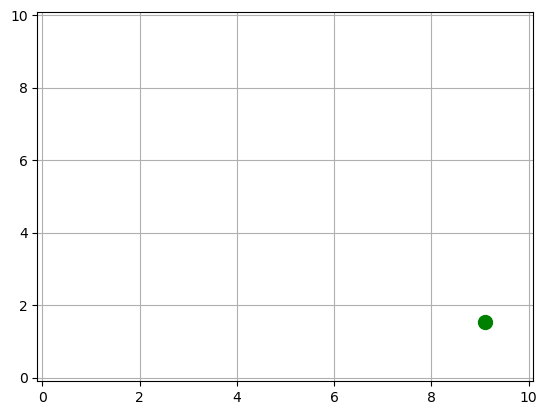

game done :)
the average time is 38.79980404376984
the scoreboard is [0, 0, 10]
the number of games completed is 10
the final number of particles in all the games: [9 0 1 0 0 0 0 0 0 0]


In [18]:
#code 11 p2
import time
iterations = 10
for i in range(iterations):
    t0 = time.time()
    plotter(2,2,1,1,scoreboard,finalnumber)
    t1 = time.time()
    times.append(t1-t0)
    
average = 0
for i in range(len(times)):
    average += times[i]*(1/len(times))
print('the average time is', average)
print('the scoreboard is', scoreboard)
print('the number of games completed is', scoreboard[0]+scoreboard[1]+scoreboard[2])
print('the final number of particles in all the games:', finalnumber)

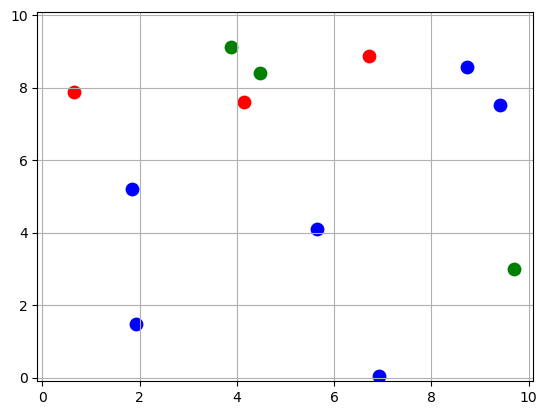

In [ ]:
#code 12
##actual prompt code
##extremely messy but gets the job done

def startpos(num):
    xa = np.full((3*num), -1, dtype=float)
    ya = np.full((3*num), -1, dtype=float) 
    xb = np.full((3*num), -1, dtype=float)  
    yb = np.full((3*num), -1, dtype=float) 
    xc = np.full((3*num), -1, dtype=float)   
    yc = np.full((3*num), -1, dtype=float)  
    for i in range(num):
        xa[i] = round(random.uniform(0, 10),2)
        ya[i] = round(random.uniform(0, 10),2)
        xb[i] = round(random.uniform(0, 10),2)
        yb[i] = round(random.uniform(0, 10),2)
        xc[i] = round(random.uniform(0, 10),2)
        yc[i] = round(random.uniform(0, 10),2)
    return xa,ya,xb,yb,xc,yc

def values(x,y,thetalist,speedlist,character1,character2,character3,line1,line2,line3):
    if ( x!= -1 and thetalist[character3,line3] == 0):
        thetalist[character3,line3] = round(random.uniform(0, 2*np.pi),2)
        speedlist[character3,line3] = round(random.uniform(1/4, 1/2),2)
    #elif (character1!=character2 and thetalist[character3,line3] == 0):
    if (thetalist[character3,line3] != 0):   
        x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
        y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
        if (x > 10 or x < 0):
            x = x - (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y - (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
            thetalist[character3,line3] = np.pi - thetalist[character3,line3]
            x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
        if (y > 10 or y < 0):
            x = x - (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y - (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
            thetalist[character3,line3] = 2*np.pi - thetalist[character3,line3]
            x = x + (speedlist[character3,line3])*(np.cos(thetalist[character3,line3]))
            y = y + (speedlist[character3,line3])*(np.sin(thetalist[character3,line3]))
    return x,y

def valuesinterm(xa,ya,xb,yb,xc,yc,thetalist,speedlist,num):
    for i in range(3*num):
        xa[i],ya[i] = values(xa[i],ya[i],thetalist,speedlist,0,0,0,i,i,i)
        xb[i],yb[i] = values(xb[i],yb[i],thetalist,speedlist,1,1,1,i,i,i)
        xc[i],yc[i] = values(xc[i],yc[i],thetalist,speedlist,2,2,2,i,i,i)
    return xa,ya,xb,yb,xc,yc

def sametypecollisions(x,y,thetalist,speedlist,character,num):
    count = 0
    for i in range(2*num):
        for j in range(2*num):
            if (0< abs(x[i]-x[j]) + abs(y[i]-y[j])<0.4 and i!=j):
               # print('sametypecol')
                thetalist[character,i] = 2*np.pi-thetalist[character,i]
                thetalist[character,j] = 2*np.pi-thetalist[character,j]
                count=1
    return count, thetalist

def differentypecollisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num):
    for i in range(3*num):
        for j in range(3*num):
            if 0 != (abs(xa[i] - xb[j]) + abs(ya[i] - yb[j])) < radius:
                k=0
                l=0
                while xc[k]!= -1:
                    k+=1
                while xc[l]!= -1 or l==k:
                    l+=1
                xc[k] = xa[i]
                yc[k] = ya[i] 
                xc[l] = xb[j]
                yc[l] = yb[j] 
                thetalist[2,k] = np.pi - thetalist[0,i]
                speedlist[2,k] = speedlist[0,i] 
                thetalist[2,l] = np.pi - thetalist[1,j]
                speedlist[2,l] = speedlist[1,j]
                xa[i] = ya[i] = xb[j] = yb[j] = -1
                thetalist[0,i] = thetalist[1,j] = 0
                return a_num, b_num, c_num,thetalist
            if 0 != (abs(xc[i] - xb[j]) + abs(yc[i] - yb[j])) < radius:
                k=0
                l=0
                while xa[k]!= -1:
                    k+=1
                while xa[l]!= -1 or l==k:
                    l+=1
                xa[k] = xc[i]
                ya[k] = yc[i] 
                xa[l] = xb[j]
                ya[l] = yb[j] 
                thetalist[0,k] = np.pi - thetalist[2,i]
                speedlist[0,k] = speedlist[2,i] 
                thetalist[0,l] = np .pi- thetalist[1,j]
                speedlist[0,l] = speedlist[1,j]
                xc[i] = yc[i] = xb[j] = yb[j] = -1
                thetalist[2,i] = thetalist[1,j] = 0
                return a_num, b_num, c_num,thetalist
            if 0 != (abs(xa[i] - xc[j]) + abs(ya[i] - yc[j])) < radius:
                k=0
                l=0
                while xb[k]!= -1:
                    k+=1
                while xb[l]!= -1 or l==k:
                    l+=1
                xb[k] = xa[i]
                yb[k] = ya[i] 
                xb[l] = xc[j]
                yb[l] = yc[j] 
                thetalist[1,k] = np.pi - thetalist[0,i]
                speedlist[1,k] = speedlist[0,i] 
                thetalist[1,l] = np.pi - thetalist[2,j]
                speedlist[1,l] = speedlist[2,j]
                xa[i] = ya[i] = xc[j] = yc[j] = -1
                thetalist[0,i] = thetalist[2,j] = 0
                return a_num, b_num, c_num,thetalist
    return a_num, b_num, c_num,thetalist
            


def collisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num):
    count_a = sametypecollisions(xa,ya,thetalist,speedlist,0,num)[0]
    count_b = sametypecollisions(xb,yb,thetalist,speedlist,1,num)[0]
    count_c = sametypecollisions(xc,yc,thetalist,speedlist,2,num)[0]
    total = count_a + count_b + count_c
    a_num,b_num,c_num,thetalist = differentypecollisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num)[0:4]
    return total,a_num,b_num,c_num,thetalist 

def gameender(xa,xb,xc,num,scoreboard,winner,finalnumber):
    variable1 = 0
    variable2 = 0
    for i in range(2*num):
        if (xa[i] != -1):
            variable2 +=1
            winner = 'red'
            value = 0
            break
    for i in range(2*num):
        if (xb[i] != -1):
            variable2 +=1
            winner = 'blue'
            value = 1
            break
    for i in range(2*num):
        if (xc[i] != -1):
            variable2 +=1
            winner = 'green'
            value = 2
            break
    if (variable2 == 1):
        scoreboard[value] += int(1)
        finalnum = 0
        for i in range(2*num):
            if xa[i] != -1 or xb[i] != -1 or xc[i] != -1:
                finalnum+=1
        finalnumber[finalnum -1] +=1
        return winner,scoreboard, finalnumber
    else:
        winner = 'a'
        return winner

def replot(xa,ya,xb,yb,xc,yc,A,B,C,num):
    for i in range(num - A):
        xa[i] = -1
        ya[i] = -1
    for i in range(num - B):
        xb[i] = -1
        yb[i] = -1
    for i in range(num - C):
        xc[i] = -1
        yc[i] = -1
    return xa,ya,xb,yb,xc,yc

def plotter(A,B,C,radius,scoreboard,finalnumber):
    num = max(A,B,C)
    a_num,b_num,c_num = 0,0,0
    thetalist = np.zeros([3,3*num])
    speedlist = np.zeros([3,3*num])
    xa,ya,xb,yb,xc,yc = startpos(num)
    xa,ya,xb,yb,xc,yc = replot(xa,ya,xb,yb,xc,yc,A,B,C,num)
    winner = ''
    while gameender(xa,xb,xc,num,scoreboard,winner,finalnumber)=='a':
        clear_output(wait=True)
        valuesinterm(xa,ya,xb,yb,xc,yc,thetalist,speedlist,num)
        a_num,b_num,c_num,thetalist = collisions(xa,ya,xb,yb,xc,yc,thetalist,speedlist,a_num,b_num,c_num,radius,num)[1:5]
        plt.scatter(xa,ya,100*radius, color = 'red')
        plt.scatter(xb,yb,100*radius, color = 'blue')
        plt.scatter(xc,yc,100*radius, color = 'green')
        plt.xlim(-0.1,10.1) 
        plt.ylim(-0.1,10.1) 
        plt.grid('on')
        plt.show()
        plt.pause(0.001)
    return print('game done :)')

#plotter(num of A, num of B, num of C, radius of collision)
plotter(4,4,4,0.8,scoreboard,finalnumber)